## Imports and setup

In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect("olist.db")

## Customers

In [4]:
customers = pd.read_sql_query("SELECT * from customers", con)

In [10]:
customers

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...,...
99436,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Text(0.5, 1.0, 'Customer count per state')

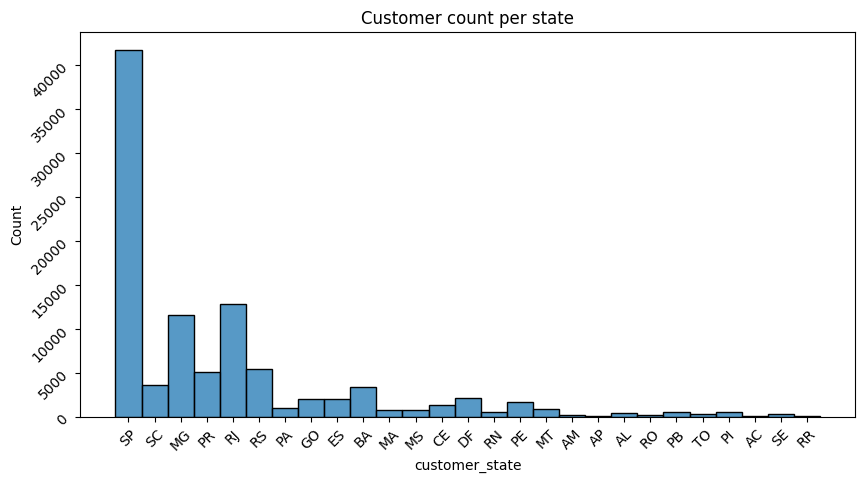

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(customers["customer_state"], ax=ax)
ax.tick_params(rotation=45)
ax.set_title("Customer count per state")

In [25]:
customers["customer_city"].value_counts()

customer_city
sao paulo                   15540
rio de janeiro               6882
belo horizonte               2773
brasilia                     2131
curitiba                     1521
                            ...  
olhos d'agua                    1
pacotuba                        1
sao sebastiao do paraiba        1
benedito leite                  1
campos verdes                   1
Name: count, Length: 4119, dtype: int64

In [19]:
customers["customer_id"].duplicated().any()

np.False_

In [24]:
customers["customer_unique_id"].value_counts()

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
1c137fe37df712015f6488edafe8ece4     1
5a1680640123fc80e801301a2fb57395     1
046470763123d3d6364f89095b4e47ab     1
aaf22868003377e859049dcf5f0b3fdf     1
206e64e8af2633a2ebe158a7fcb860db     1
Name: count, Length: 96096, dtype: int64

## Orders

In [27]:
orders = pd.read_sql_query("SELECT * from orders", con)

In [28]:
orders

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


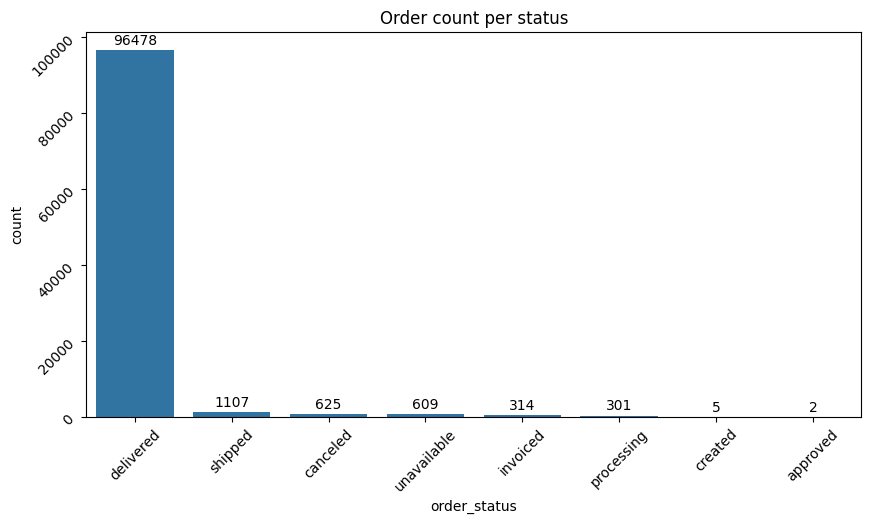

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(orders["order_status"].value_counts(), ax=ax)
ax.tick_params(rotation=45)
ax.set_title("Order count per status")
for c in ax.containers:
    labels = [int(v.get_height()) if int(v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=2)

In [3]:
def visualize_smth(df:pd.DataFrame, x:str="order_purchase_timestamp", y=None, date_format:str='%Y-%m-%d %H:%M:%S', suptitle:str="Title", method=sns.displot, subplot_params:dict={}, **plot_params):
    data = df.copy()
    try:
        # Convert event_date from string to datetime
        data[x] = pd.to_datetime(data[x], format=date_format, errors='raise')
    except Exception:
        print("Data on X axis will not be considered as a date.")
    finally:
        data = data.sort_values(by=x)
        data = data.reset_index(drop=True)
    
    def wrapper(**params):
        ax = plt.gca()
        ax.tick_params(axis='x', labelrotation=90, labelbottom=True)

    method_type = type(method())
    plt.close()
    if method_type == sns.axisgrid.FacetGrid:
        g = method(data=data, x=x, y=y, **plot_params, **subplot_params)
    else:
        g = sns.FacetGrid(data=data, **plot_params)
        g.map_dataframe(func=method, x=x, y=y, **subplot_params)
    g.map_dataframe(func=wrapper)
    g.figure.suptitle(suptitle, y=1)
    g.tight_layout()
    plt.show()

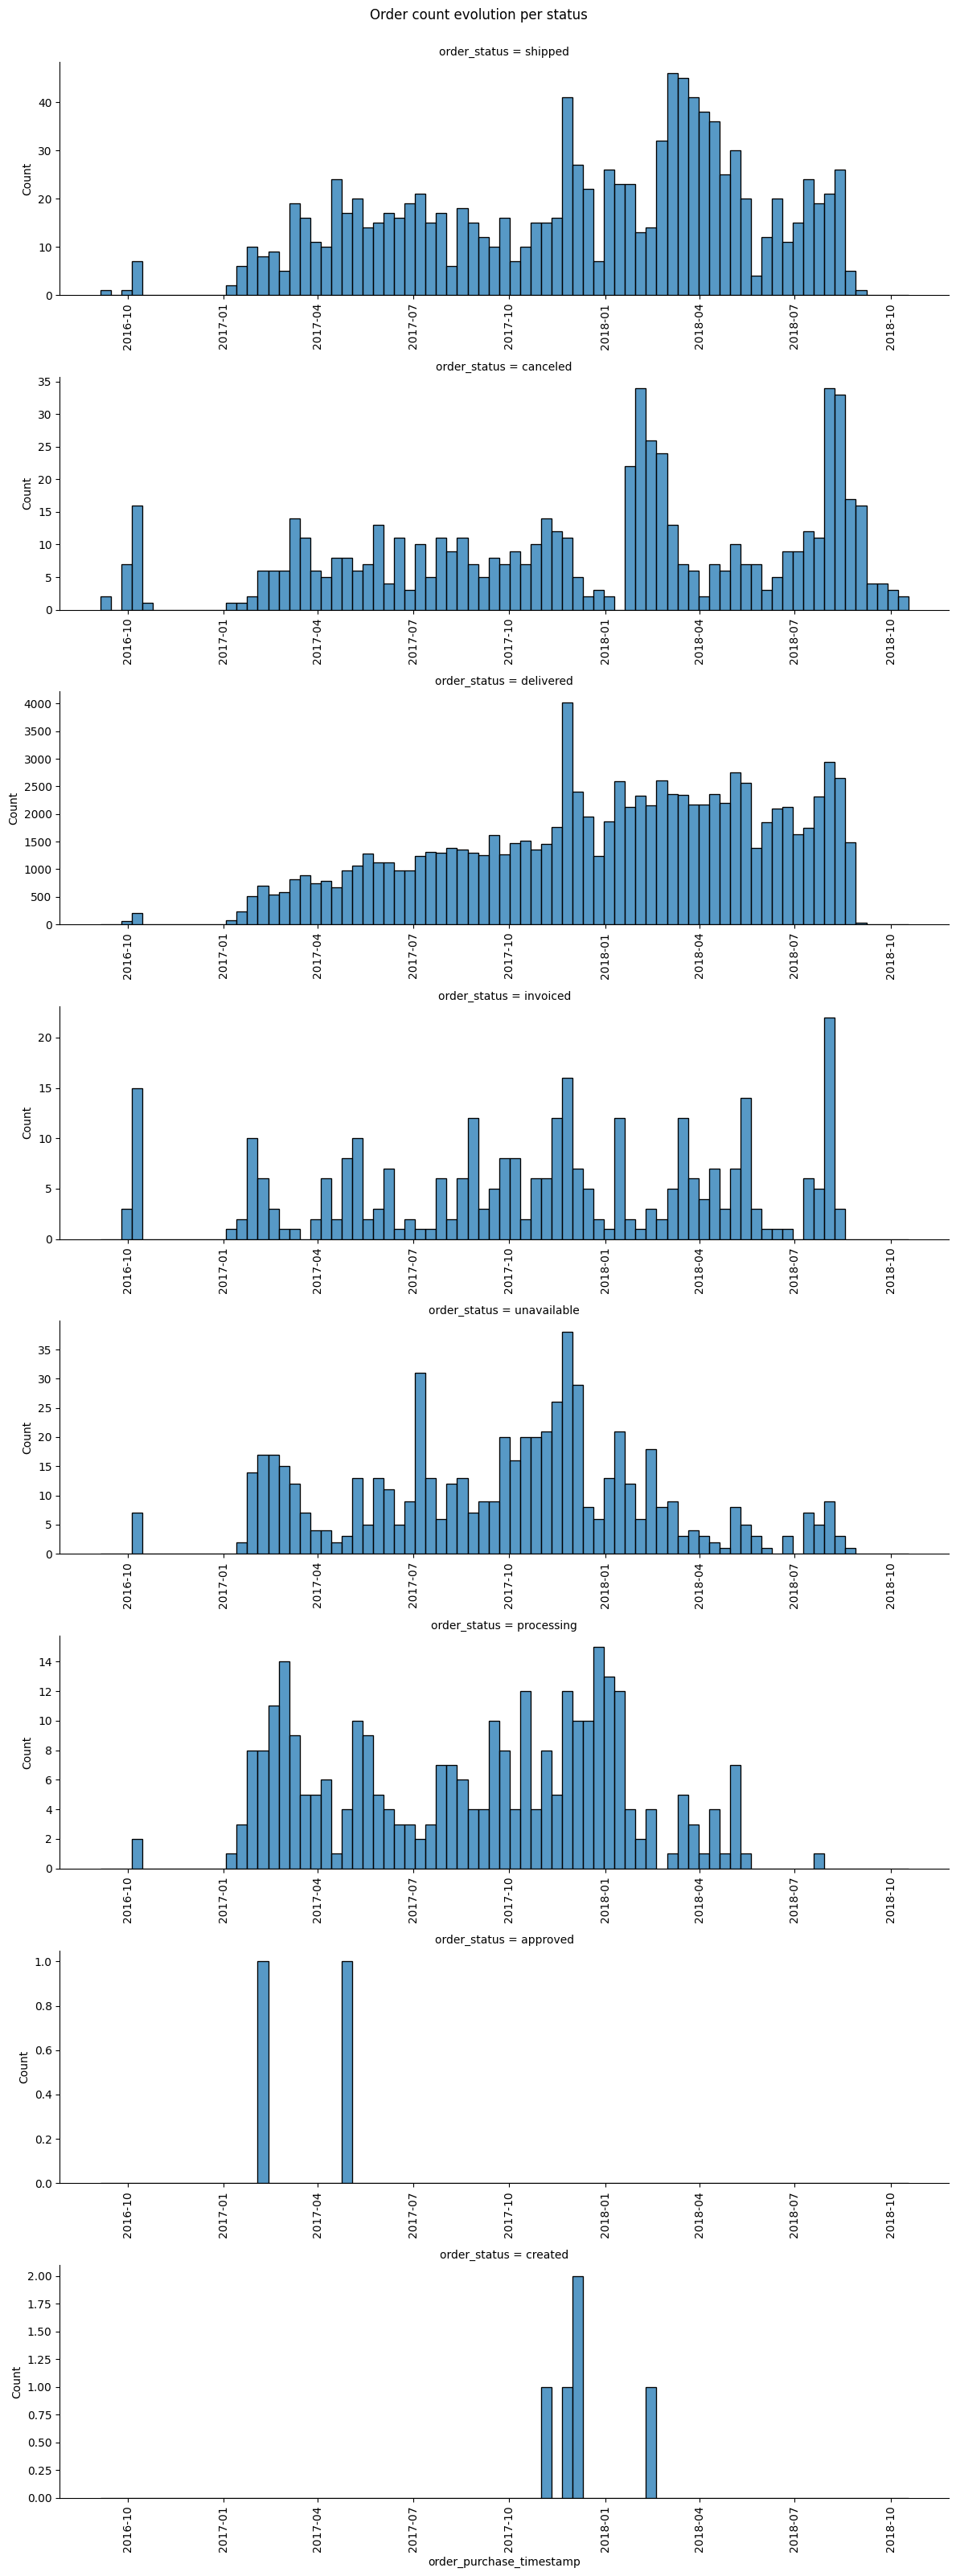

In [ ]:
visualize_smth(orders, suptitle="Order count evolution per status", row="order_status", height=4, aspect=3, facet_kws=dict(sharey=False))

## Products

In [51]:
products = pd.read_sql_query("SELECT * from products", con)

In [52]:
products

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [58]:
products["product_category_name"].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

Text(0.5, 1.0, 'Product name length distribution')

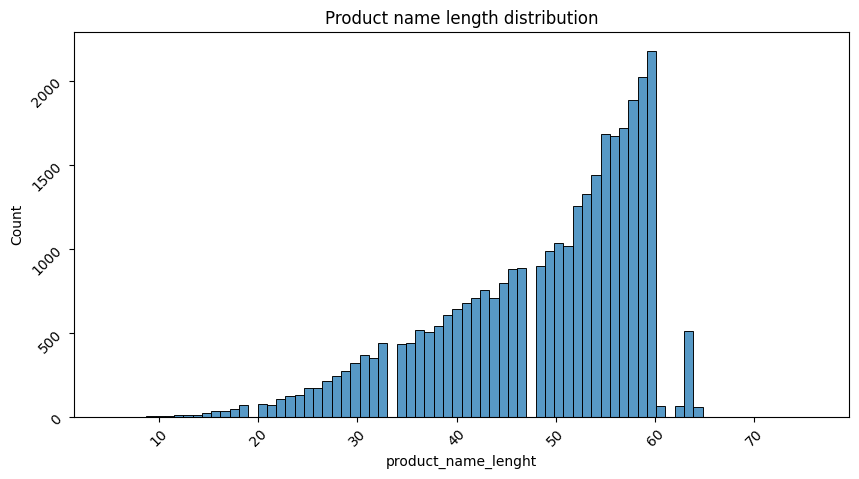

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(products["product_name_lenght"], ax=ax)
ax.tick_params(rotation=45)
ax.set_title("Product name length distribution")

Text(0.5, 1.0, 'Product weight distribution (log scale)')

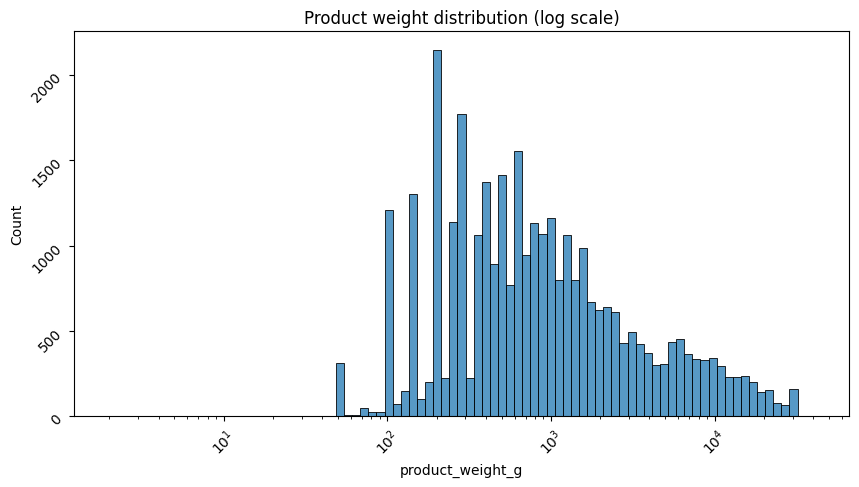

In [78]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(products["product_weight_g"], ax=ax, log_scale=True)
ax.tick_params(rotation=45)
ax.set_title("Product weight distribution (log scale)")

## RFM

In [5]:
RFM_query = """
WITH orders_with_today AS (
    SELECT -- DISTINCT is not necessary because all customer_id are unique in 'orders' dataset
        order_id,
        customer_id,
        order_purchase_timestamp,
        MAX(order_purchase_timestamp) OVER () AS today
    FROM orders
)
SELECT
    customers.customer_unique_id,
    MIN(JULIANDAY(orders_with_today.today)-JULIANDAY(orders_with_today.order_purchase_timestamp)) AS recency, -- number of days since the last 
    COUNT(orders_with_today.order_id) AS frequency, -- total count of orders made
    SUM(order_pymts.payment_value) AS amount -- total expenses
FROM customers
INNER JOIN orders_with_today ON orders_with_today.customer_id = customers.customer_id
INNER JOIN order_pymts ON order_pymts.order_id = orders_with_today.order_id
GROUP BY customers.customer_unique_id
"""

In [6]:
rfm = pd.read_sql_query(RFM_query, con)

In [7]:
rfm

,customer_unique_id,recency,frequency,amount
0,0000366f3b9a7992bf8c76cfdf3221e2,160.273507,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163.263090,1,27.19
2,0000f46a3911fa3c0805444483337064,585.850868,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369.875428,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336.905972,1,196.89
...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,495.853958,1,2067.42
96091,fffea47cd6d3cc0a88bd621562a9d061,310.890532,1,84.58
96092,ffff371b4d645b6ecea244b27531430a,617.070162,1,112.46
96093,ffff5962728ec6157033ef9805bacc48,168.092095,1,133.69


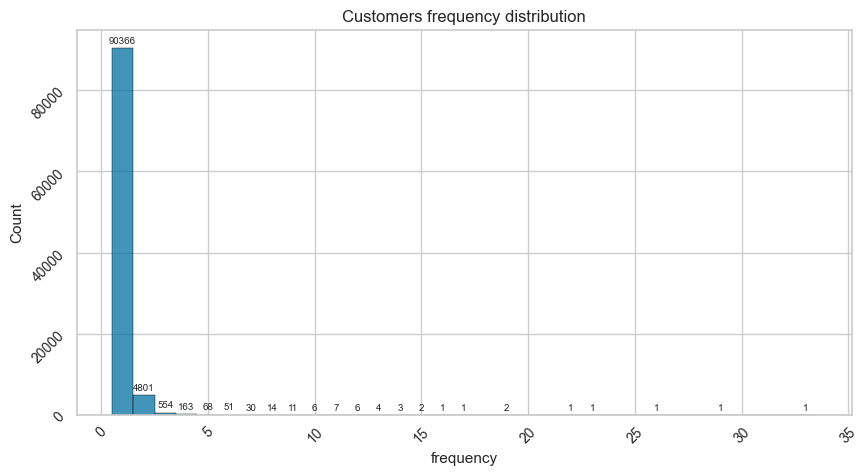

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(rfm["frequency"], ax=ax, discrete=True)
ax.tick_params(rotation=45)
ax.set_title("Customers frequency distribution")
for c in ax.containers:
    labels = [int(v.get_height()) if int(v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=2, fontsize=7)

Text(0.5, 1.0, 'Customers recency distribution')

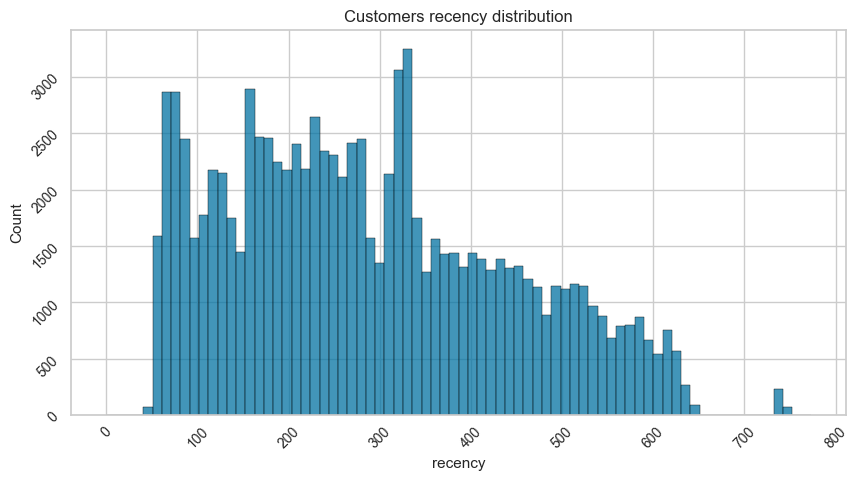

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(rfm["recency"], ax=ax)
ax.tick_params(rotation=45)
ax.set_title("Customers recency distribution")

Text(0.5, 1.0, 'Customers amount distribution (log scale)')

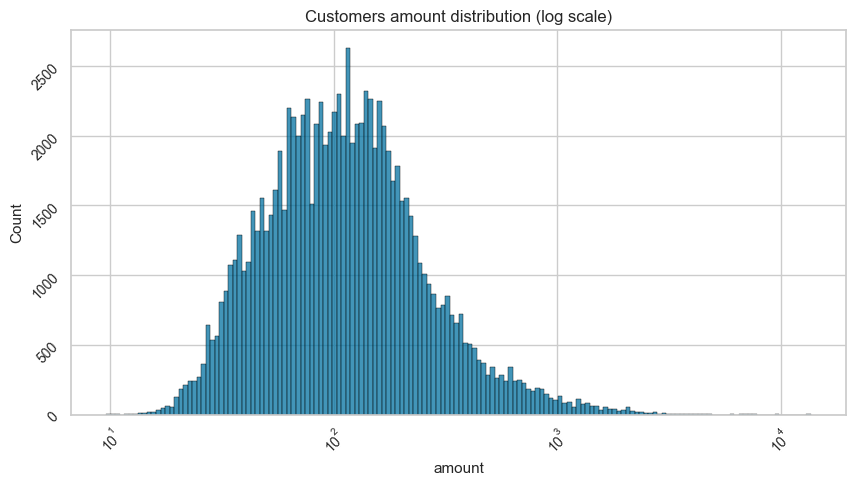

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(rfm["amount"], ax=ax, log_scale=True)
ax.tick_params(rotation=45)
ax.set_title("Customers amount distribution (log scale)")

Text(0.5, 1.0, 'Customers amount / recency distribution (log scale)')

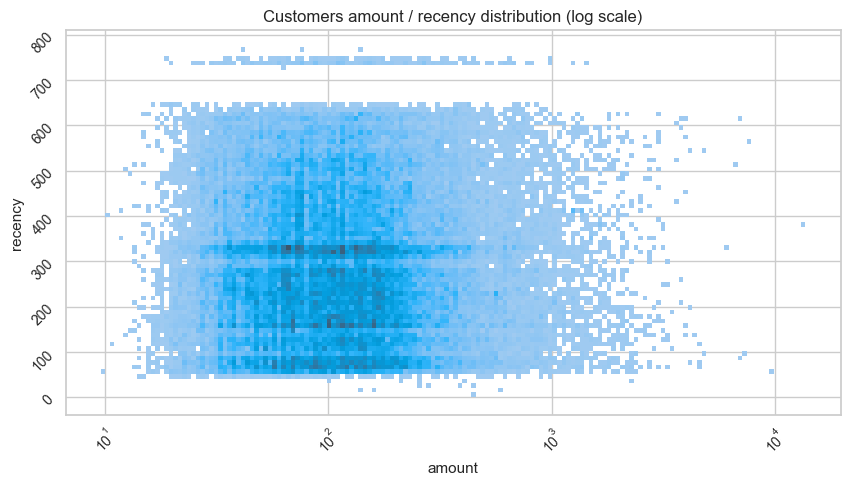

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=rfm.loc[(rfm["amount"] != 0) & (rfm["recency"] != 0)], x="amount", y="recency", ax=ax, log_scale=(True, False))
ax.tick_params(rotation=45)
ax.set_title("Customers amount / recency distribution (log scale)")

Text(0.5, 1.0, 'Customers amount / frequency distribution (log scale)')

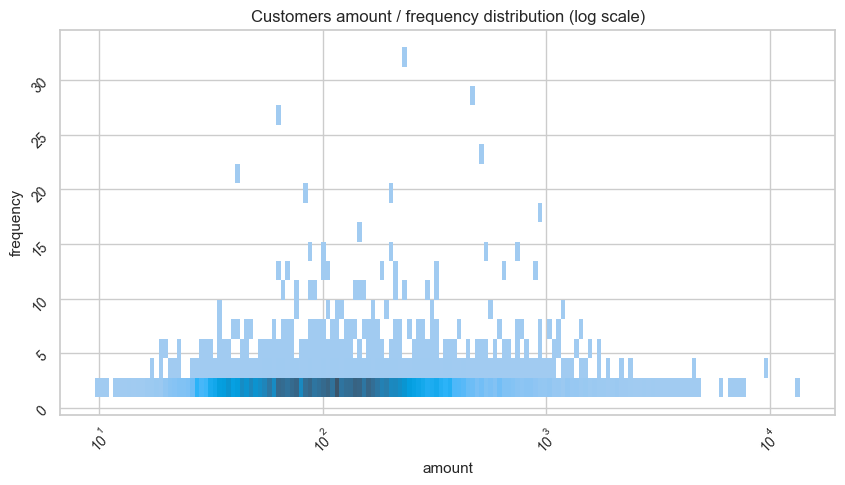

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=rfm.loc[(rfm["amount"] != 0)], x="amount", y="frequency", ax=ax, log_scale=(True, False))
ax.tick_params(rotation=45)
ax.set_title("Customers amount / frequency distribution (log scale)")

Text(0.5, 1.0, 'Customers recency / frequency distribution')

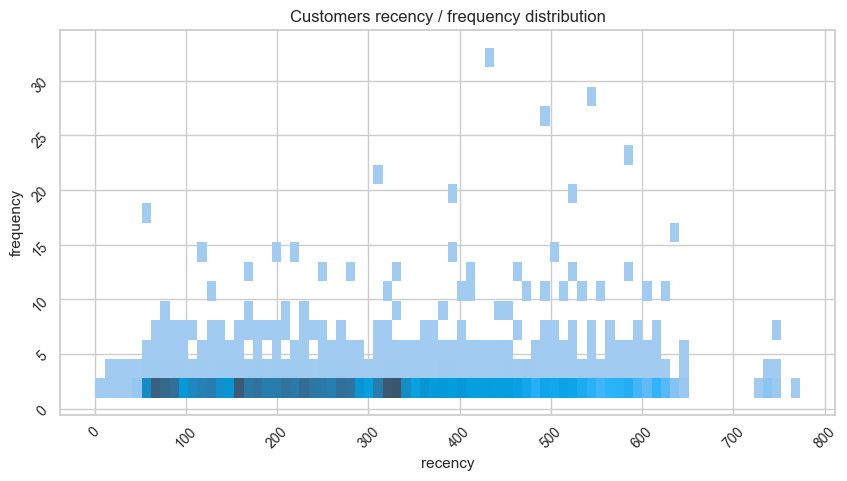

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=rfm.loc[(rfm["recency"] != 0)], x="recency", y="frequency", ax=ax)
ax.tick_params(rotation=45)
ax.set_title("Customers recency / frequency distribution")

## K-means

In [18]:
import os

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import pickle

In [31]:
RANDOM_STATE = 42
clustering_results_folder = os.path.join("utils", "clustering_results")

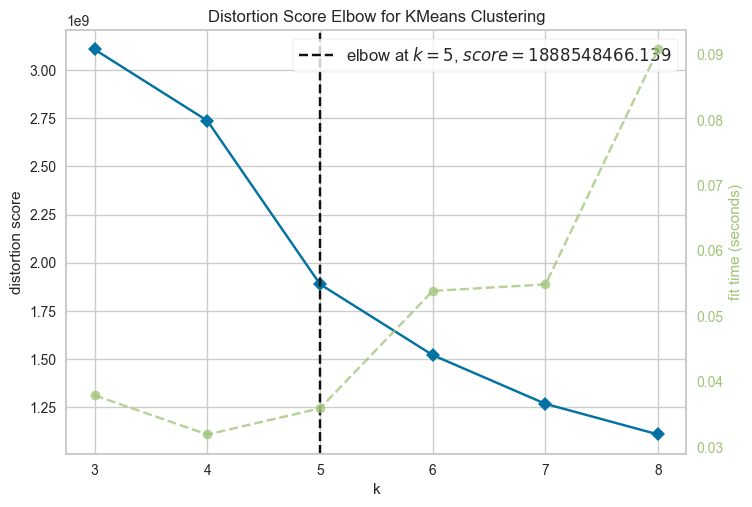

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
X = rfm.drop(columns="customer_unique_id")

# Instantiate the clustering model and visualizer
model = KMeans(random_state=RANDOM_STATE)
visualizer = KElbowVisualizer(model, k=(3,9))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

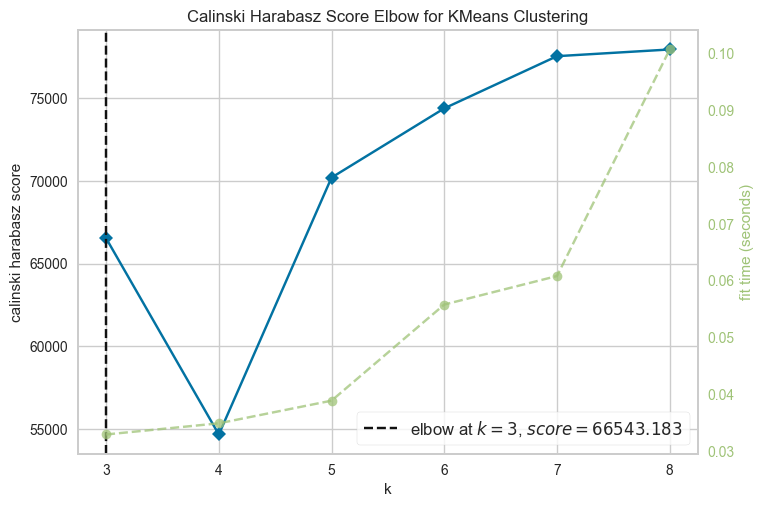

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [15]:
model = KMeans(random_state=RANDOM_STATE)
visualizer = KElbowVisualizer(model, k=(3,9), metric='calinski_harabasz')

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

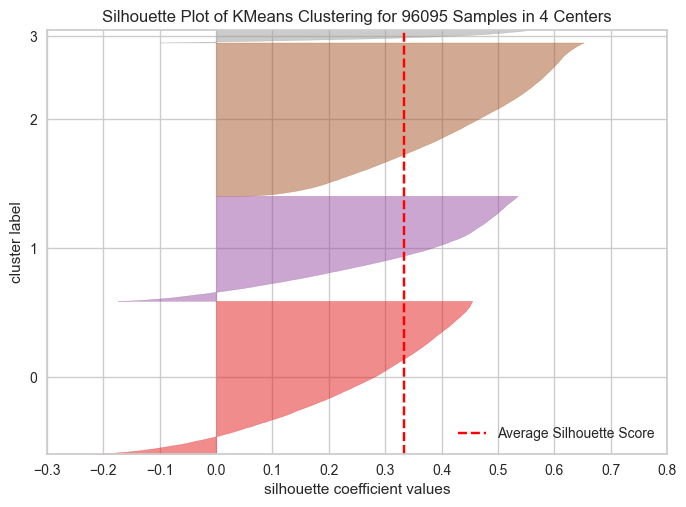

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 96095 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
model = KMeans(4, random_state=RANDOM_STATE)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [32]:
def save_clustering_results(df:pd.DataFrame, fitted_model, experiment_name:str):
    if hasattr(fitted_model, "labels_"):
        df_copy = df.copy()
        df_copy["cluster"] = fitted_model.labels_
        with open(os.path.join(clustering_results_folder, experiment_name), 'wb') as f:
            pickle.dump(df_copy, f)
        return
    raise AttributeError("Passed model does not have 'labels_' attribute. The model should be fitted first.")

In [34]:
def load_clustering_results(experiment_name:str):
    with open(os.path.join(clustering_results_folder, experiment_name), 'rb') as f:
        results = pickle.load(f)
    return results

In [35]:
# save_clustering_results(X, fitted_model=model, experiment_name="basic_rfm")
basic_rfm = load_clustering_results("basic_rfm")

Text(0.5, 1.0, 'Customers amount distribution')

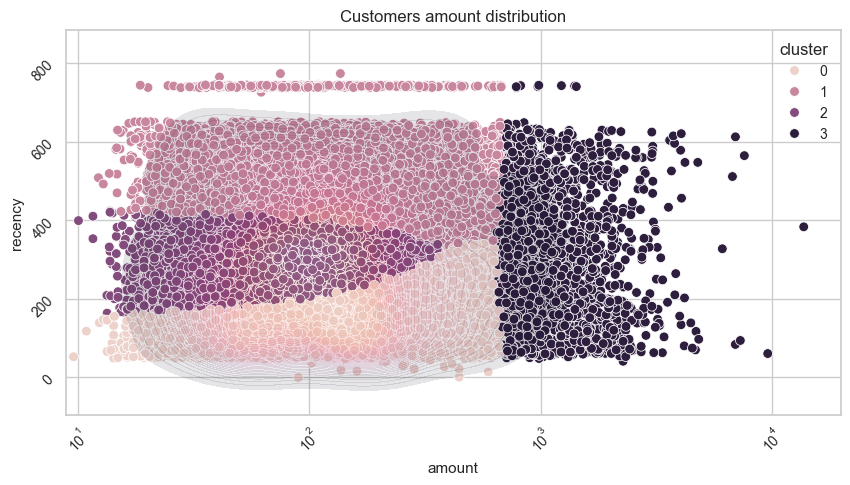

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(basic_rfm, x="amount", y="recency", hue="cluster", ax=ax)
sns.kdeplot(basic_rfm.loc[(basic_rfm["amount"] != 0) & (basic_rfm["recency"] != 0)].sample(1000), x="amount", y="recency", ax=ax, levels=50, fill=True, thresh=0.03, alpha=0.1, cmap="rocket", cut=3, log_scale=(True, False))
ax.tick_params(rotation=45)
ax.set_title("Customers clustering distribution")

Text(0.5, 1.0, 'Customers amount distribution')

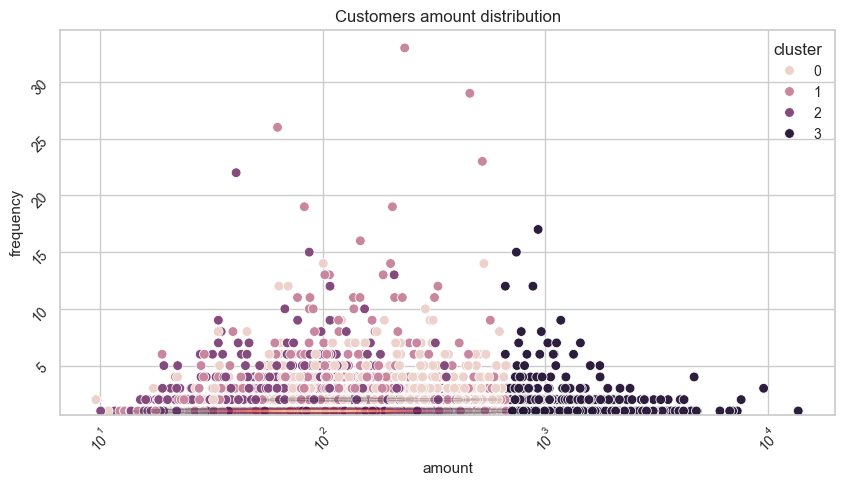

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(basic_rfm, x="amount", y="frequency", hue="cluster", ax=ax)
sns.kdeplot(basic_rfm.loc[(basic_rfm["amount"] != 0) & (basic_rfm["frequency"] != 0)].sample(1000), x="amount", y="frequency", ax=ax, levels=50, fill=True, thresh=0.03, alpha=0.1, cmap="rocket", cut=3, log_scale=(True, False))
ax.tick_params(rotation=45)
ax.set_title("Customers amount distribution")